<a href="https://colab.research.google.com/github/pavan-kolachanakota/EDUTRAION/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[85236    59]
 [    1 85297]]
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     85295
  Fraudulent       1.00      1.00      1.00     85298

    accuracy                           1.00    170593
   macro avg       1.00      1.00      1.00    170593
weighted avg       1.00      1.00      1.00    170593

AUC Score: 0.9999994690394112
Transaction 1: Genuine
Transaction 2: Genuine
Transaction 3: Genuine
Transaction 4: Fraud
Transaction 5: Fraud
Transaction 6: Genuine
Transaction 7: Fraud
Transaction 8: Genuine
Transaction 9: Fraud
Transaction 10: Fraud


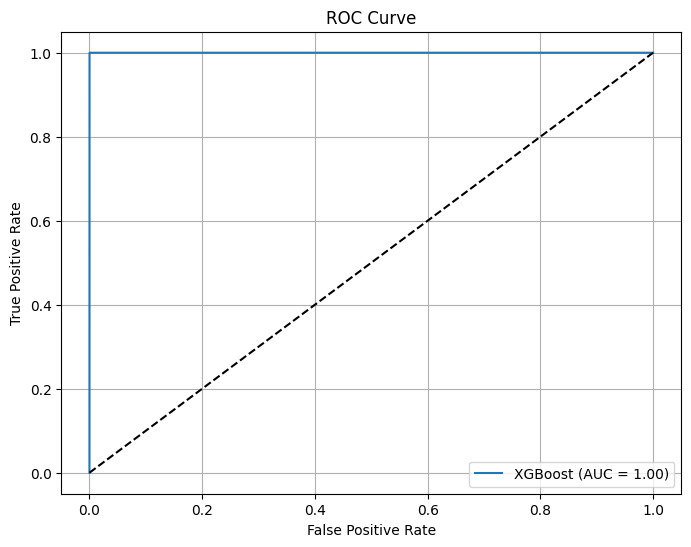

"\nfpr, tpr, _ = roc_curve(y_test, y_prob)\nplt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))\nplt.plot([0, 1], [0, 1], 'k--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve')\nplt.legend()\nplt.grid()\nplt.show()\n"

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

df = pd.read_csv('/content/creditcard.csv')

X = df.drop('Class', axis=1)
y = df['Class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_scaled, y)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in splitter.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_idx], X_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Genuine', 'Fraudulent']))
print("AUC Score:", roc_auc_score(y_test, y_prob))

for i in range(10):  # Showing first 10 results
    result = "Fraud" if y_pred[i] == 1 else "Genuine"
    print(f"Transaction {i+1}: {result}")

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

